# Example of PCA on a set of random 2-D points

It is given a dataset of random points in a 2-D space. Each point is represented by a column vector of 2 elements (x,y). I consider a dataset of 10 points.

Text(0, 0.5, 'y')

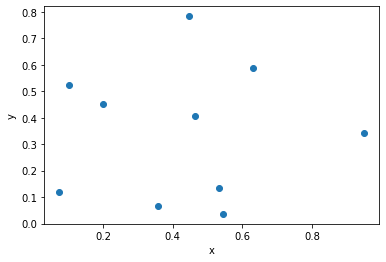

In [143]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.rand(2,10)
plt.figure()
plt.scatter(X[0,:],X[1,:])
plt.xlabel('x')
plt.ylabel('y')

Now we want to find P that minimized the average reconstruction error between each point and the same subspace P

In [144]:
K = np.shape(X)[1] # number of points/samples

We have to build the covariance matrix but before we have to **center** the dataset by subracting the mean. The mean can be seen as a 'representative point' of the dataset in fact its shape is (1,2)

In [145]:
mu = X.mean(axis = 1).reshape((2,1))
mu

array([[0.43058548],
       [0.34464842]])

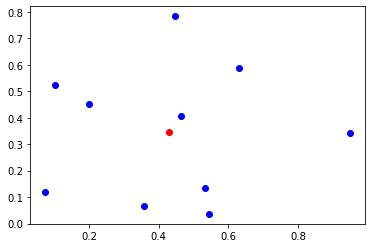

In [146]:
plt.scatter(X[0,:],X[1,:], color='blue')
plt.scatter(mu[0,:],mu[1,:], color='red')

Now subtract the mean to the dataset X 

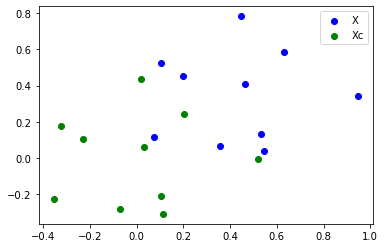

In [147]:
Xc = X - mu # X centered
plt.scatter(X[0,:],X[1,:], color='blue', label='X')
plt.scatter(Xc[0,:],Xc[1,:], color='green', label='Xc')
plt.legend()

Now we can compute the covariance matrix C

In [148]:
C = 1/K * np.dot(Xc,Xc.T)
C

array([[0.06245147, 0.00184586],
       [0.00184586, 0.05677098]])

With the eigenvalue decomposition of C we can find the matrix U of the eigenvectors of C

In [149]:
sigma, U = np.linalg.eigh(C)
print('Eigenvalues of C in ascending order: %s' % sigma)
print('Eigenvectors of C: %s' % U)

Eigenvalues of C in ascending order: [0.05622387 0.06299859]
Eigenvectors of C: [[ 0.28417998 -0.95877095]
 [-0.95877095 -0.28417998]]


Now that we have computed the decomposition of C we can check that it is correct

In [150]:
np.dot(np.dot(U,np.eye(2,2)*sigma), U.T) # must be equal to C

array([[0.06245147, 0.00184586],
       [0.00184586, 0.05677098]])

Once computed U, to obtain P it is sufficient to keep only the m eigenvectors correspondent to the highest m eigenvalues

In [151]:
m = 1

In [152]:
U1 = U[:,::-1] # U but with the columns in revers order (the first column correspond to the max eigenvalue and so on)

In [153]:
P = U1[:,0:m] # take the columns from 0 to m
P

array([[-0.95877095],
       [-0.28417998]])

Now i can project my centered dataset on P

In [154]:
y = np.dot(P.T, X)

In [155]:
x_reconstruct = P*y + mu

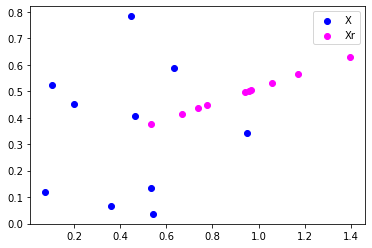

In [156]:
plt.scatter(X[0,:],X[1,:], color='blue', label='X')
plt.scatter(x_reconstruct[0,:],x_reconstruct[1,:], color = 'magenta', label = 'Xr')
plt.legend()